In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center><h1><b> DS303 Course Project </b></h1> </center>
<center> Spring Semester 2021, Under Prof. Biplab Banarjee </center>

Group members:


*   Sanket Ghyar - 190110023 - Metallurgical Engineering and Materials Science, 2nd Year
*   Arif Ahmad - 190110010 - Electrical Engineering, BTech 2nd Year
*   Naresh Balamurgan - 190110051 - Metallurgical Engineering and Materials Science, 2nd Year
*   Yash Shah - 190020136 - Chemical Engineering, BTech 2nd Year





<h2>Importing required Libraries </h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import Flatten,Conv2D, MaxPooling2D
from keras.utils import np_utils

<h3><b>We have used multiple machine learning methods like Neural Networks, Convolutional Neural Networks and SVM to train a machine learning model on the MNIST dataset; capable of classifying digits.</b></h3>



<h1><b>1. Classification using Neural Network</b></h1>

<h4>Loading Data from keras library and analyzing it</h4>

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [ ]:
print(f"Size of training data set is: {X_train.shape}")
print(f"Size of test data set is: {X_test.shape}")
print(f"Size of training labels' set is: {y_train.shape}")
print(f"Size of test labels' set is: {y_test.shape}")

Size of training data set is: (60000, 28, 28)
Size of test data set is: (10000, 28, 28)
Size of training labels' set is: (60000,)
Size of test labels' set is: (10000,)


In [ ]:
print(y_train)
print('As can be seen above the labels of the data set are not one-hot encoded and carry the labels as the numbers they represnt.')

[5 0 4 ... 5 6 8]
As can be seen above the labels of the data set are not one-hot encoded and carry the labels as the numbers they represnt.


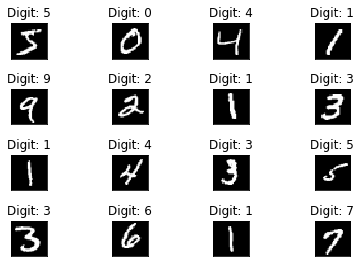

In [ ]:
#Plotting the first few digits in dataset as image
fig = plt.figure()
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title(f"Digit: {y_train[i]}")
  plt.xticks([])
  plt.yticks([])

<h3><b>Pixel Distribution and Data Normalization</b></h3>

Text(0.5, 1.0, 'Pixel Value Distribution')

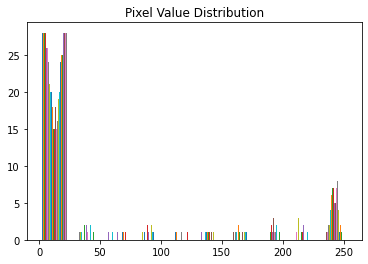

In [ ]:
plt.hist(X_train[0])
plt.title("Pixel Value Distribution")

As we can see in the above plot; the pixel values range between 0 and 255 in the 28x28 image. We can normalize the pixel values to lie between 0 and 1, to help spped up training.

<h3><b> Normalizing data </b> </h3>

We will also reshape the 28x28 image input to a 784 sized input feature vector.

In [ ]:
#reshaping the data feature size from 28x28 to single vector of size 784
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing Data
X_train /= 255
X_test /= 255

In [ ]:
#Printing final input shape ready for training
print(f'Train Matrix Shape: {X_train.shape}')
print(f'Test Matrix Shape: {X_test.shape}')

Train Matrix Shape: (60000, 784)
Test Matrix Shape: (10000, 784)


<h3><b>One hot encoding the labels</b></h3>

As can be seen below the labels are from the set {0,1,2,3,..8,9} in both the training and test data sets, however it would be desirable to have one hot encoded labels for ease of interpretation of the output produced after an input runs through the neural network as well as for training the model.

In [ ]:
#Priniting unique values in y_train and y_test and their counts
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


In [ ]:
#one-hot encoding using numpy
n_classes = 10
print(f'Shape before one hot encoding: {y_train.shape}')
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(f'Shape after one hot encoding: {Y_train.shape}')

Shape before one hot encoding: (60000,)
Shape after one hot encoding: (60000, 10)


<br>




<h1><b>Building the Neural Network</b></h1>

We will be building a neural network with two hidden 512-node layers. And for multi-class classification we add another densely connected layer for the 10 output classes. The input vector is of size 784. We will be using the softmax activation function in the last layer for connections to the 10 class nodes. Softmax activation function is used as it is common to use softmax activation for training in multi-class classification.

We will be using the ReLU activation function in the hidden layers.

In [ ]:
#building a linear stack of layers using Sequential Model in Keras

model = Sequential()

#Adding first Hidden Layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Adding Second Hidden Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Softmax Classification Layer
model.add(Dense(10))
model.add(Activation('softmax'))

<h3><b> Summary Of model </h3>

In [ ]:
#Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

<h2><b>Training the model</b></h2>

Categorical Cross Entropy will be used as a loss function for optimizing model parameters. And we are using Stochastic Gradient Descent (SGD) for optimization.

Compiling

In [ ]:
#Compiling the Sequential Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')

Training

In [ ]:
#training the model and saving the metrics in saved_model

saved_model = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 5s - loss: 1.2076 - accuracy: 0.6876 - val_loss: 0.5346 - val_accuracy: 0.8699
Epoch 2/20
469/469 - 4s - loss: 0.5321 - accuracy: 0.8491 - val_loss: 0.3744 - val_accuracy: 0.8985
Epoch 3/20
469/469 - 5s - loss: 0.4255 - accuracy: 0.8774 - val_loss: 0.3229 - val_accuracy: 0.9080
Epoch 4/20
469/469 - 5s - loss: 0.3790 - accuracy: 0.8895 - val_loss: 0.2932 - val_accuracy: 0.9172
Epoch 5/20
469/469 - 5s - loss: 0.3445 - accuracy: 0.8995 - val_loss: 0.2698 - val_accuracy: 0.9242
Epoch 6/20
469/469 - 4s - loss: 0.3188 - accuracy: 0.9079 - val_loss: 0.2523 - val_accuracy: 0.9275
Epoch 7/20
469/469 - 5s - loss: 0.2989 - accuracy: 0.9130 - val_loss: 0.2386 - val_accuracy: 0.9326
Epoch 8/20
469/469 - 4s - loss: 0.2804 - accuracy: 0.9185 - val_loss: 0.2254 - val_accuracy: 0.9357
Epoch 9/20
469/469 - 5s - loss: 0.2675 - accuracy: 0.9222 - val_loss: 0.2146 - val_accuracy: 0.9396
Epoch 10/20
469/469 - 5s - loss: 0.2545 - accuracy: 0.9269 - val_loss: 0.2043 - val_accuracy: 0.9421

<h3><b>Plotting the metrics</b></h3>

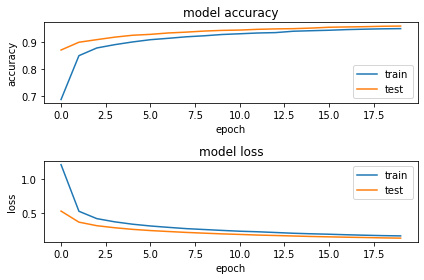

In [ ]:
fig = plt.figure()

plt.subplot(2,1,1)
plt.plot(saved_model.history['accuracy'])
plt.plot(saved_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(saved_model.history['loss'])
plt.plot(saved_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

<h1> <b> Evaluating Model Perormance </b> </h1>

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - loss: 0.1426 - accuracy: 0.9580


In [ ]:
print(f'Test loss: {loss_and_metrics[0]}')
print(f'Test Accuracy: {loss_and_metrics[1]}')

Test loss: 0.1426311731338501
Test Accuracy: 0.9580000042915344


Below we check the exact numbers of correctly classified and missclafied samples from the test data set. We also see in picture which samples are misclassified and find that the miss classified samples do have some inherent ambiguity in which number they represent due to unclear strokes.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9580  classified correctly
420  classified incorrectly


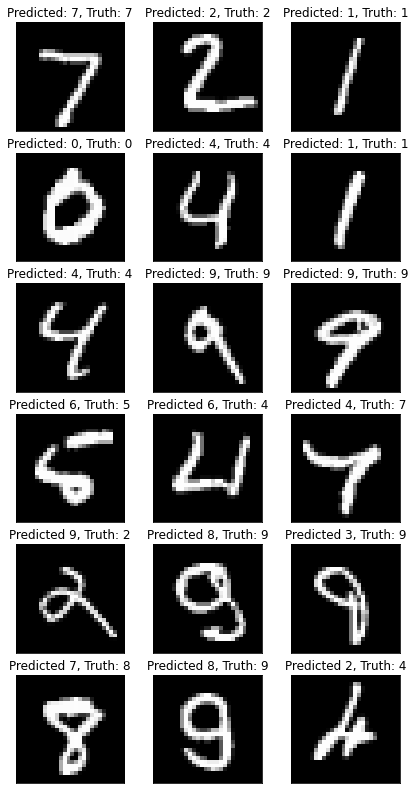

In [ ]:
# load the model and create predictions on the test set
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

<br><br><br>
<h1><b>2. Classification using Convolutional Neural Network</b></h1>

Now, we try to do the same classification using a more advanced method - Convolutional Neural Networks, and try to guage any advantages or disadvantages in the same.



As we have already pre-processed the data; we just need to create the model using CNN now, train it, test it, and see its performance and accuracy

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Normalizing the data

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

### Resizing image for Convolutional layer

In [ ]:
img_size = 28
X_trainr = np.array(X_train).reshape(-1, img_size, img_size, 1)
X_testr = np.array(X_test).reshape(-1, img_size, img_size, 1)
print('Training images dimensions', X_trainr.shape)
print('Testing images dimensions', X_testr.shape)
print(len(X_trainr))

Training images dimensions (60000, 28, 28, 1)
Testing images dimensions (10000, 28, 28, 1)
60000



<h1><b>Building the Convolutional Neural Network</b></h1>

In building this Convolutional Neural Network, we have used three CNN layers; each consisting of 64 layers and a 3x3 kernel densely connected and used a softmax layer at the end for multiclass classification.

In [ ]:
model = Sequential()

#### Convolutional Layer 1

In [ ]:
model.add(Conv2D(64,(3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Convolutional Layer 2

In [ ]:
model.add(Conv2D(64,(3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Convolutional Layer 3

In [ ]:
model.add(Conv2D(64,(3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully Connected Layer 1

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#### Fully Connected Layer 2

In [ ]:
model.add(Dense(32))
model.add(Activation('relu'))

#### Fully Connected Layer 3

In [ ]:
model.add(Dense(16))
model.add(Activation('relu'))

#### Last Fully Connected Layer 

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

<h3><b> Summary of Model </b> </h3>

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 64)       

<h2><b>Training the model</b></h2>

Compiling

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

Training

In [ ]:
history = model.fit(X_trainr, y_train, epochs = 5, validation_data= (X_trainr, y_train))

Epoch 1/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.7077 - accuracy: 0.7648 - val_loss: 0.1707 - val_accuracy: 0.9605
Epoch 2/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1299 - accuracy: 0.9618 - val_loss: 0.1020 - val_accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0918 - accuracy: 0.9719 - val_loss: 0.0732 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0717 - accuracy: 0.9775 - val_loss: 0.0608 - val_accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0640 - accuracy: 0.9801 - val_loss: 0.0492 - val_accuracy: 0.9880


<h3><b>Plotting the metrics</b></h3>

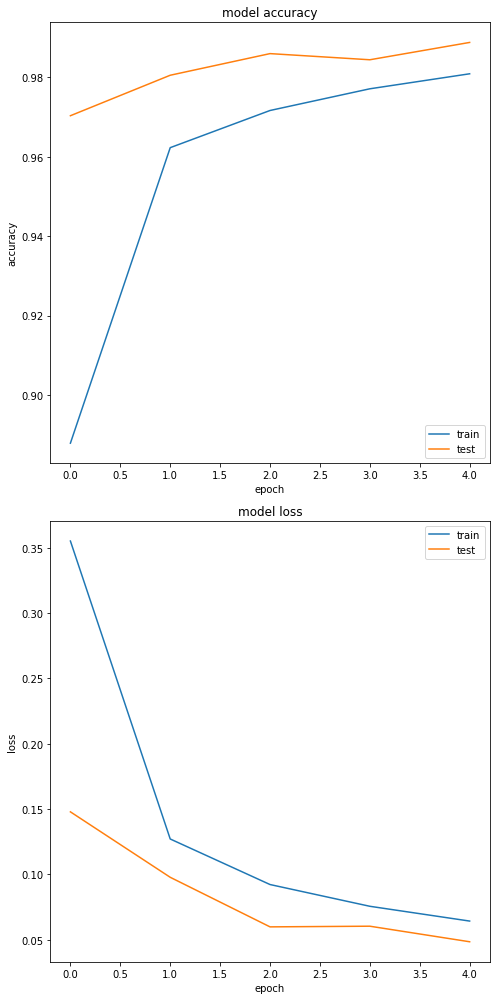

In [ ]:
fig = plt.figure()

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

<h1> <b> Evaluating Model Perormance </b> </h1>

In [ ]:
loss_and_metrics = model.evaluate(X_testr, y_test, verbose=2)

313/313 - 4s - loss: 0.0608 - accuracy: 0.9849


In [ ]:
print(f'Test loss: {loss_and_metrics[0]}')
print(f'Test Accuracy: {loss_and_metrics[1]}')

Test loss: 0.06081494688987732
Test Accuracy: 0.9848999977111816


Below we check the exact numbers of correctly classified and missclafied samples from the test data set. We also see in picture which samples are misclassified and find that the miss classified samples do have some inherent ambiguity in which number they represent due to unclear strokes.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9849  classified correctly
151  classified incorrectly


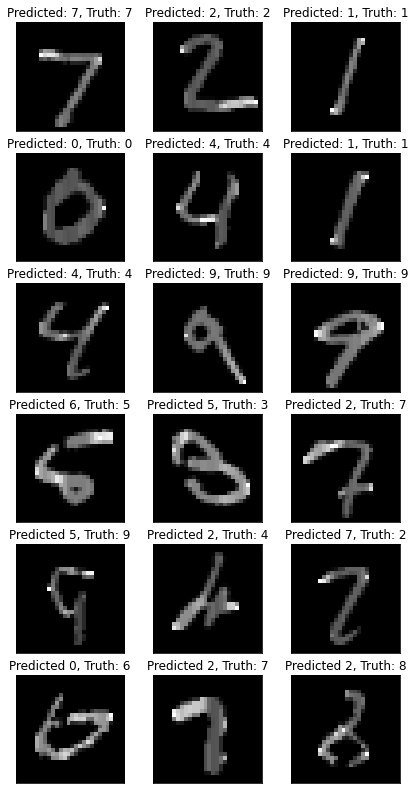

In [ ]:
# load the model and create predictions on the test set
predicted_classes = model.predict_classes(X_testr)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_testr[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_testr[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

<br><br><br>
<h1><b>3. Classification using  Support Vector Machines</b></h1>

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#reshaping the data feature size from 28x28 to single vector of size 784
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
## Normalization

X_train = X_train/255.0
X_test= X_test/255.0

print("Train_Data:", X_train.shape)
print("Test_Data:",X_test.shape)

Train_Data: (60000, 784)
Test_Data: (10000, 784)


In [ ]:
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

<h3><b>SVM LINEAR KERNEL MODEL BUILDING</b></h3>

In [ ]:
# linear model
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(scaled_X_train, y_train)

# predict
y_pred = model_linear.predict(scaled_X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9281 

[[ 953    0    6    2    1    8    6    2    1    1]
 [   0 1118    7    2    0    1    2    1    4    0]
 [   9   12  956   11    9    4    5    5   18    3]
 [   7    1   15  940    0   17    1    6   19    4]
 [   3    2   18    1  928    0    3    6    3   18]
 [   7    6    7   40    5  791   12    1   20    3]
 [  14    3   17    1    9   19  892    0    3    0]
 [   2    8   23   14   11    2    0  945    2   21]
 [  11    7   10   29    8   23    8    6  860   12]
 [   9    7    6   11   38    5    0   23   12  898]]


<h3><b>SVM RBF KERNEL MODEL BUILDING</b></h3>

In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(scaled_X_train, y_train)

# predict
y_pred = non_linear_model.predict(scaled_X_test)

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9656 

[[ 967    0    2    1    0    3    3    2    2    0]
 [   0 1125    5    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    3  980    1    7    0   12    7    0]
 [   0    0   13    0  945    2    3    7    2   10]
 [   2    0    2   11    1  857    6    5    6    2]
 [   6    2    0    0    4    8  927    6    5    0]
 [   1    6   13    3    3    0    0  989    0   13]
 [   3    0    6    5    6   10    3   12  926    3]
 [   4    5    6   11   13    2    0   21    3  944]]
